## SI 670 Applied Machine Learning, Week 3:  Regularization, Logistic Regression, and Evaluation (Due Thursday Sept 30, 2021 12:59pm)

For this assignment, you will be exercising on questions related to linear regression, polynomial feature expansion, underfitting/overfitting, and cross-validation.

Each question is worth 20 points, for a total of 80 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file to the Canvas site - IMPORTANT: please name your submitted file si670-hw3-youruniqname.ipynb and be sure to put your name at the top of your notebook file.

As a reminder, feel free to discuss general approaches to the homework with classmates, but the notebook code you submit must be your own work. 


### Put your name here: Cameron Milne

### Put your uniquename here: ccmilne

### Preliminary
In this assignment you will train several linear classifier models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud). Then you'll perform a grid search to find optimal parameters. 
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
# # run this cell if you are using Colab

# !rm -rf fraud_data.csv

# import io

# from google.colab import files as colab_files
# uploaded = colab_files.upload()
# files = {'fraud_data.csv': io.BytesIO(uploaded['fraud_data.csv'])}

# # upload 'fraud_data.csv'

In [2]:
# run this cell if you are using Jupyter
files = {'fraud_data.csv': 'fraud_data.csv'}

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(files['fraud_data.csv'])

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

In [4]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21688,-3.959670,3.297819,-1.079436,-2.290106,-1.405133,2.452586,-4.649235,-12.365464,0.409493,1.251992,...,12.617463,-2.969195,1.755050,0.433324,-0.010827,-0.126613,0.200111,-0.160542,29.95,0
21689,-1.066503,0.539240,0.735343,-0.506800,0.843980,-1.047877,1.141302,-0.127448,-0.119221,-1.870265,...,-0.162535,-0.576352,-0.184969,-0.136154,0.760012,0.048105,-0.017475,0.092365,85.66,0
21690,-2.175162,-0.441681,1.883137,-0.267440,1.056972,0.136404,0.113595,-0.055983,0.765616,-0.087568,...,-0.201561,0.397761,-0.855500,-0.627900,0.590977,0.515065,0.433089,-0.150291,131.10,0
21691,0.031406,0.694817,0.083233,-0.797912,0.564318,-0.560787,0.805901,0.051453,-0.053817,-0.200190,...,-0.255891,-0.664635,0.018844,-0.539177,-0.504019,0.155133,0.232846,0.079420,4.49,0


### Question 1 (20 points)

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

Then train a LogisticRegression classifier with C=1. What is the accuracy? What is the recall?

*This function should a return a tuple with four floats, i.e. `(dummy_accuracy, dummy_recall, lr_accuracy, lr_recall)`.*

In [5]:
def answer_one():
    # YOUR CODE HERE
    from sklearn.linear_model import LogisticRegression
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score

    #Dummy Classifier
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    
    dummy_accuracy = accuracy_score(y_test, y_dummy_predictions)
    dummy_recall = recall_score(y_test, y_dummy_predictions)

    #Logistic Regression
    model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
    weighted_prediction = model.predict(X_test)

    lr_accuracy = accuracy_score(weighted_prediction, y_test)
    lr_recall = recall_score(y_test, weighted_prediction)
    
    return dummy_accuracy, dummy_recall, lr_accuracy, lr_recall

answer_one()

(0.9852507374631269, 0.0, 0.9966814159292036, 0.8)

### Question 2 (20 points)

Fit the LogisticRegression with `C` varying from `[[0.1, 1, 10]` and report the accuracy, precision, recall, and F1 scores for each choice of `C`.

*This function should a return a tuple with four lists, i.e. `(accuracy_list, precision_list, recall_list, f1_list)`, and each list should contain 3 numbers, one per choice of C*

In [6]:
def answer_two():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

    # YOUR CODE HERE
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    
    for num in [0.1, 1, 100]:
        model = LogisticRegression(solver='lbfgs', max_iter=1000, C=num).fit(X_train, y_train)
        y_predictions = model.predict(X_test)
        
        accuracy_list.append(accuracy_score(y_test, y_predictions))
        precision_list.append(precision_score(y_test, y_predictions))
        recall_list.append(recall_score(y_test, y_predictions))
        f1_list.append(f1_score(y_test, y_predictions))


    return accuracy_list, precision_list, recall_list, f1_list

answer_two()

([0.9964970501474927, 0.9966814159292036, 0.9966814159292036],
 [0.9692307692307692, 0.9696969696969697, 0.9696969696969697],
 [0.7875, 0.8, 0.8],
 [0.8689655172413793, 0.8767123287671234, 0.8767123287671234])

### Question 3 (20 points)

Train a logistic regression classifier with `C=10` using X_train and y_train.

For the logistic regression classifier, create (1) a precision-recall curve and (2) an ROC curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the ROC curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall_at_p75, tpr_at_fpr16)`.*
*You should also include code that uses the scikit-learn (sklearn.metrics) functions precision_recall_curve and roc_curve to generate the precision/recall and ROC curves above*

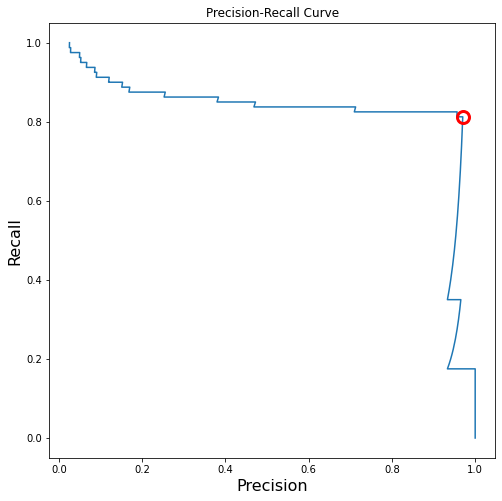

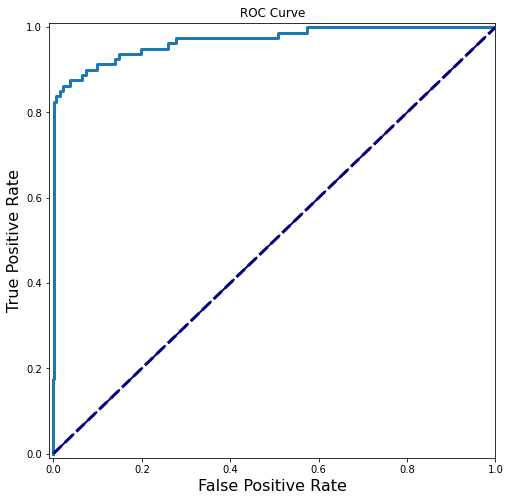

(0.825, 0.9375)

In [7]:
def answer_three():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc

    # YOUR CODE HERE
    model = LogisticRegression(solver='lbfgs', max_iter=1000, C=10)
    y_scores_lr = model.fit(X_train, y_train).decision_function(X_test)
    
    #Precision Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    
    plt.figure(figsize=(8, 8))
    plt.title('Precision-Recall Curve')
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.show()
    
    #ROC Curve
    false_positive_rates, true_positive_rates, thresholds = roc_curve(y_test, y_scores_lr)
    roc_auc = auc(false_positive_rates, true_positive_rates)

    plt.figure(figsize=(8, 8))
    plt.plot(false_positive_rates, true_positive_rates, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.show()
    
    recall_at_p75 = np.interp(0.75, precision, recall)
    tpr_at_fpr16 = np.interp(0.16, false_positive_rates, true_positive_rates)
    
    return recall_at_p75, tpr_at_fpr16

answer_three()

### Question 4 (20 Points)

Suppose you have trained a classifier distinguishing Benign vs Malignant cancers. And the confusion matrix of your classifier is given below.

|      	| Predicted: Benign 	| Predicted: Malignant 	|
|:----:	|----	|----	|
| Actual: Benign 	|    10000	|   100 	|
| Actual: Malignant  	|    200	|   10 	|

### Question (a) (10 points) 
If we assume Benign is the positive class and Malignant is the negative class, what are the precision and recall for Benign? If we assume Malignant is the positive class and Benign is the negative class, what are the precision and recall for Malignant?

*This function should return a tuple of four float numbers: `(precision_benign, recall_benign, precision_malignant, recall_malignant)`. You can calculate these scores either by coding, or by hand using the correct formulas for precision and recall.*

In [8]:
def answer_four_a():
    
    # Coding or manually calculating the precision and recall scores here. 
    #Precision Benign
    precision_benign = 10000 / (10000 + 200)
    recall_benign = 10000 / (10000 + 100)
    precision_malignant = 10 / (10 + 100)
    recall_malignant = 10 / (200 + 10)

    return precision_benign, recall_benign, precision_malignant, recall_malignant

answer_four_a()

(0.9803921568627451,
 0.9900990099009901,
 0.09090909090909091,
 0.047619047619047616)

### Question (b) (10 points) 
If you have another classifier with the following confusion matrix, which classifier do you prefer and why? (Hint: calculate the precision and recall scores for this classifier and compare with the previous classifier, considering what the relative costs are for each type of mistake.)

|      	| Predicted: Benign 	| Predicted: Malignant 	|
|:----:	|----	|----	|
| Actual: Benign 	|    7000	|   3100 	|
| Actual: Malignant  	|    30	|   180 	|

#### Answer to question 4 (b)

Write your answer here.

In [9]:
print("precision_benign: {}".format(7000 / (7000 + 30)))
print("recall_benign: {}".format(7000 / (7000 + 3100)))
print("precision_malignant: {}".format(180 / (180 + 3100)))
print("recall_malignant: {}".format(180 / (180 + 30)))

precision_benign: 0.9957325746799431
recall_benign: 0.693069306930693
precision_malignant: 0.054878048780487805
recall_malignant: 0.8571428571428571


After reviewing the two classifiers, the 2st classifier is the most desirable outcome when considering the precision and recall scores. For one, the precision of a true positive rate is slightly higher (about 1.5%) suggesting a higher rate of accuracy for accurate results. But more importantly, the recall_malignant of the 2nd classifier is far higher (about 81%). This is an important outcome as there are fewer individuals who are wrongly predicted to be benign, but are actually malignant -- a sign that more individuals in the 2nd classifier will have had ample time to seek treatment. 